<a href="https://colab.research.google.com/github/nswapnil31/Data-Science-Projects/blob/main/Expedia_Marketing_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the libraries**

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Descriptive Analytics (Conversion Rate)**

Definition Conversion Rate:

The conversion rate describes the ratio of visits/clicks to conversions achieved. Conversions are conversions from prospects to customers or buyers. They can for example consist of purchases or downloads.

Here Conversion = Net Orders/Visits

In [106]:
df = pd.read_csv('/content/Marketing_Analytics.csv', parse_dates=['Date'])
df = df.query("Date != '2017-02-29'")
df['Date'] = pd.to_datetime(df['Date'])
df['Geographic Region'] = df['Geographic Region'].astype(str)
df['Platform'] = df['Platform'].astype(str)
df['Marketing Channel'] = df['Marketing Channel'].astype(str)
df['Date'] = df['Date'].astype(str)
df.head()

,Date,Geographic Region,Platform,Marketing Channel,Visits,Qualified Shoppers,Bounced Visits,Gross Orders,Net Orders,Net Room Nights
0,2017-01-01,Geo Region 1,Desktop,Channel 1,3011,1878,811,1139,957,1848
1,2017-01-01,Geo Region 1,Desktop,Channel 2,119684,82504,26541,12489,10369,19897
2,2017-01-01,Geo Region 1,Desktop,Channel 3,25612,11828,7398,1399,1139,2257
3,2017-01-01,Geo Region 1,Desktop,Channel 4,3115,1463,1393,69,50,81
4,2017-01-01,Geo Region 1,Desktop,Channel 5,5657,4307,1346,641,517,921


In [107]:
#df['Cancelled_Orders'] = df['Gross Orders']-df['Net Orders']
#df['Net_conversion_Rate'] = df['Net Orders']/df['Visits']*100
#df['Gross_conversion_Rate'] = df['Gross Orders']/df['Visits']*100

df['Bounce Rate'] = df['Bounced Visits'] / df['Visits']
df['Conversion Rate'] = df['Net Orders'] / df['Qualified Shoppers']
df['Net Room Night Rate'] = df['Net Room Nights'] / df['Net Orders']


In [108]:
df.head()

,Date,Geographic Region,Platform,Marketing Channel,Visits,Qualified Shoppers,Bounced Visits,Gross Orders,Net Orders,Net Room Nights,Bounce Rate,Conversion Rate,Net Room Night Rate
0,2017-01-01,Geo Region 1,Desktop,Channel 1,3011,1878,811,1139,957,1848,0.269346,0.509585,1.931034
1,2017-01-01,Geo Region 1,Desktop,Channel 2,119684,82504,26541,12489,10369,19897,0.221759,0.125679,1.918893
2,2017-01-01,Geo Region 1,Desktop,Channel 3,25612,11828,7398,1399,1139,2257,0.288849,0.096297,1.981563
3,2017-01-01,Geo Region 1,Desktop,Channel 4,3115,1463,1393,69,50,81,0.447191,0.034176,1.620000
4,2017-01-01,Geo Region 1,Desktop,Channel 5,5657,4307,1346,641,517,921,0.237935,0.120037,1.781431


In [109]:
corr_matrix = df.corr()
print(corr_matrix["Net Room Nights"].sort_values(ascending=False))

Net Room Nights        1.000000
Net Orders             0.992873
Gross Orders           0.991644
Qualified Shoppers     0.873516
Visits                 0.706643
Bounced Visits         0.350050
Conversion Rate        0.179282
Net Room Night Rate   -0.007869
Bounce Rate           -0.225182
Name: Net Room Nights, dtype: float64


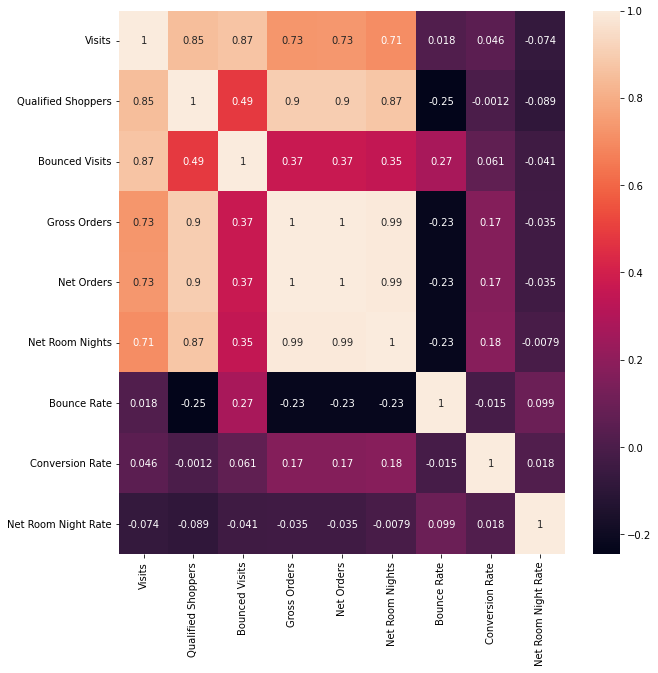

In [110]:
plt.figure(figsize=(10,10)) 
sns.heatmap(corr_matrix, annot = True)
plt.show()

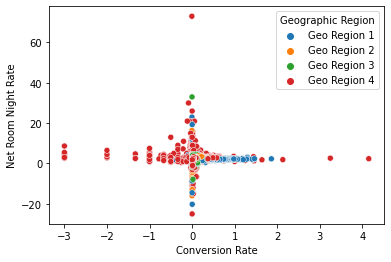

In [111]:
sns.scatterplot(data=df, x='Conversion Rate', y='Net Room Night Rate', hue='Geographic Region')
plt.show()

In [116]:
X = df[['Geographic Region', 'Platform', 'Marketing Channel', 'Visits', 'Qualified Shoppers', 'Bounced Visits', 'Gross Orders', 'Net Orders']]
y = df['Net Room Nights']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
model = LinearRegression()

In [119]:
model.fit(X_train, y_train)

ValueError: ignored

In [120]:
region_group = df.groupby('Geographic Region')['Net Room Nights'].mean()

In [127]:
# Create a bar chart of mean Net Room Nights by region using plotly
fig = px.bar(region_group, x=region_group.index, y=region_group.values, labels={'x':'Region', 'y':'Mean Net Room Nights'}, title='Mean Net Room Nights by Region')
fig.show()

In [122]:
# Group the data by marketing channel and calculate the mean Net Room Nights
channel_group = df.groupby('Marketing Channel')['Net Room Nights'].mean()

In [128]:
# Create a bar chart of mean Net Room Nights by marketing channel using plotly
fig = px.bar(channel_group, x=channel_group.index, y=channel_group.values, labels={'x':'Marketing Channel', 'y':'Mean Net Room Nights'}, title='Mean Net Room Nights by Marketing Channel')
fig.show()

In [124]:
# Group the data by platform and calculate the mean Net Room Nights
platform_group = df.groupby('Platform')['Net Room Nights'].mean()

In [129]:
# Create a bar chart of mean Net Room Nights by platform using plotly
fig = px.bar(platform_group, x=platform_group.index, y=platform_group.values, labels={'x':'Platform', 'y':'Mean Net Room Nights'}, title='Mean Net Room Nights by Platform')
fig.show()

In [130]:
# Use linear regression to identify variables that have the most impact on Net Room Nights
X = df[['Visits', 'Qualified Shoppers', 'Bounced Visits', 'Gross Orders', 'Net Orders']]
y = df['Net Room Nights']

# Create a linear regression model
model = LinearRegression()

# Train the model using the data
model.fit(X, y)

# Print the coefficients of the model
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef)

                    Coefficient
Visits                 0.023986
Qualified Shoppers    -0.052079
Bounced Visits        -0.026926
Gross Orders          -0.501887
Net Orders             2.962646


In [32]:
conversion_rate_by_platform = df.groupby(by='Platform')['Net_conversion_Rate'].sum() / df.groupby(by='Platform')['Net_conversion_Rate'].count()
pd.DataFrame(conversion_rate_by_platform.reset_index().rename(columns={'Net_conversion_Rate':'Net_conversion_Rate_%'})).head()

,Platform,Net_conversion_Rate_%
0,Desktop,4.825437
1,Mobile,2.189596


In [33]:
conversion_rate_by_Channel = df.groupby(by='Marketing Channel')['Net_conversion_Rate'].sum() / df.groupby(by='Marketing Channel')['Net_conversion_Rate'].count()
pd.DataFrame(conversion_rate_by_Channel.reset_index().rename(columns={'Net_conversion_Rate':'Net_conversion_Rate_%'}))

,Marketing Channel,Net_conversion_Rate_%
0,Channel 1,9.422664
1,Channel 10,3.912272
2,Channel 11,-7.697799
3,Channel 2,4.859580
4,Channel 3,3.109704
5,Channel 4,1.156584
6,Channel 5,4.890271
7,Channel 6,1.367304
8,Channel 7,1.718318
9,Channel 8,2.524457


In [34]:
conversion_rate_by_region = df.groupby(by='Geographic Region')['Net_conversion_Rate'].sum() / df.groupby(by='Geographic Region')['Net_conversion_Rate'].count()
pd.DataFrame(conversion_rate_by_region.reset_index().rename(columns={'Net_conversion_Rate':'Net_conversion_Rate_%'}))

,Geographic Region,Net_conversion_Rate_%
0,Geo Region 1,5.581263
1,Geo Region 2,3.620289
2,Geo Region 3,2.522571
3,Geo Region 4,2.305942


**Drivers behind Marketing Engagement**

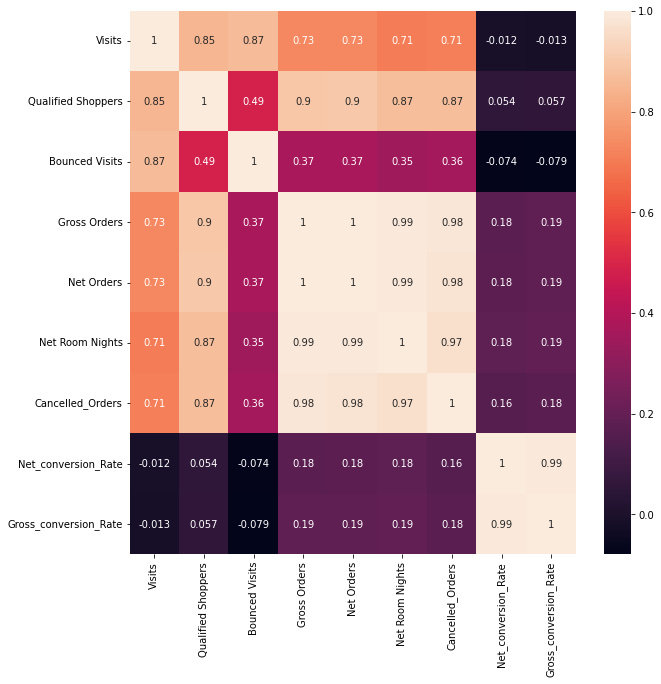

In [35]:
plt.figure(figsize=(10,10)) 
corr = df.corr()

sns.heatmap(corr, annot=True)
plt.show()